#                         Flu Shot Learning
#### Mohammed Hammoud
#### Ola Haydar

Problem statement: 
predict whether people will get H1N1 and seasonal flu vaccines based on their  backgrounds, opinions, and health behaviors.

The Goal: 
reduce cost( no need to produce new vaccine if people don't want to take it)
Know which features afftect on people to get vaccinated.

## 1) Load DataSet

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('training_set_features.csv', sep=',', index_col='respondent_id')
y_train = pd.read_csv('training_set_labels.csv', sep=',', index_col='respondent_id')
#merge y_train with X_train
df = pd.concat((X_train, y_train['h1n1_vaccine'],y_train['seasonal_vaccine']), axis=1)

## 2) Exploratory Data Analysis(EDA)

In [3]:
# dataset dimension(number of people* number of features)
print('train_set with 2 target ',df.shape) 
#print('test_set to predict ',X_test_to_predict.shape)
columns_name = df.columns
print(columns_name)

train_set with 2 target  (26707, 37)
Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')


In [4]:
import random
# func delete rows that have nan value
def drop_null_values(df):
    df.dropna( how = 'any',inplace = True)
    return df
# func Encode categorical columns
def EncodeCategorical(df):
    catgorical_columns = df.select_dtypes(include=['object']).columns
    for c in catgorical_columns:
        categories = df[c].unique()
        num_categories = len(categories)#df[c].nunique()
        code = random.sample(range(0,num_categories),num_categories)
        dictt = {}
        for i in range(len(code)):
            dictt[categories[i]]=code[i]       
        df[c] = df[c].map(dictt)
    return df


In [5]:
#func print clumnns name with thier unique values
def printUnoqueValue(df):
    for i in df.columns:
        print(i,df[i].unique())

def dropCols(col2Del,df):
    df.drop(col2Del,axis = 1, inplace = True)
    return df

from sklearn.preprocessing import  StandardScaler
def normalizeData(df,columsName):
    features = df[columsName]
    scaler = StandardScaler().fit(features.values)
    df[columsName] = scaler.transform(features.values)
    return df

In [6]:
print("fatures datatype",set(df.dtypes),"\n")
printUnoqueValue(df)

fatures datatype {dtype('O'), dtype('float64'), dtype('int64')} 

h1n1_concern [ 1.  3.  2.  0. nan]
h1n1_knowledge [ 0.  2.  1. nan]
behavioral_antiviral_meds [ 0.  1. nan]
behavioral_avoidance [ 0.  1. nan]
behavioral_face_mask [ 0.  1. nan]
behavioral_wash_hands [ 0.  1. nan]
behavioral_large_gatherings [ 0.  1. nan]
behavioral_outside_home [ 1.  0. nan]
behavioral_touch_face [ 1.  0. nan]
doctor_recc_h1n1 [ 0. nan  1.]
doctor_recc_seasonal [ 0. nan  1.]
chronic_med_condition [ 0.  1. nan]
child_under_6_months [ 0.  1. nan]
health_worker [ 0.  1. nan]
health_insurance [ 1. nan  0.]
opinion_h1n1_vacc_effective [ 3.  5.  4.  2.  1. nan]
opinion_h1n1_risk [ 1.  4.  3.  2.  5. nan]
opinion_h1n1_sick_from_vacc [ 2.  4.  1.  5.  3. nan]
opinion_seas_vacc_effective [ 2.  4.  5.  3.  1. nan]
opinion_seas_risk [ 1.  2.  4.  3.  5. nan]
opinion_seas_sick_from_vacc [ 2.  4.  1.  5. nan  3.]
age_group ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education ['< 1

In [7]:
df = EncodeCategorical(df) # Encode categorical variable
df = drop_null_values(df)#handle missing variable
X = df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis = 1)
Y = pd.concat((df['h1n1_vaccine'],df['seasonal_vaccine']), axis = 1)
X = normalizeData(X, X.columns)# user defination function to normalize data using 
                               # sklearn.preprocessing.StandardScaler

### Analysis of the data

In [8]:
import seaborn as sns
sns.set()
sns.set_style('darkgrid')

In [9]:
def getCorrFeat_target(X,Y, name):
    tmp = {}
    for var in X.columns:
        tmp[var] = round(abs(Y[name].corr(X[var])), 3)
    t = sorted(tmp.items(),key=lambda x: x[1],reverse=True)
    a = list(tmp.keys())
    b = list(tmp.values())
    plt.figure(figsize =(20,10))
    plt.barh(a,b,color=['blue'])
    plt.title("features correlation with "+name)
    plt.grid(axis='x')
    plt.xlabel('features');
    plt.ylabel('correlation');
    return t[0:3]

[('opinion_seas_risk', 0.432), ('doctor_recc_seasonal', 0.382), ('opinion_seas_vacc_effective', 0.381)]


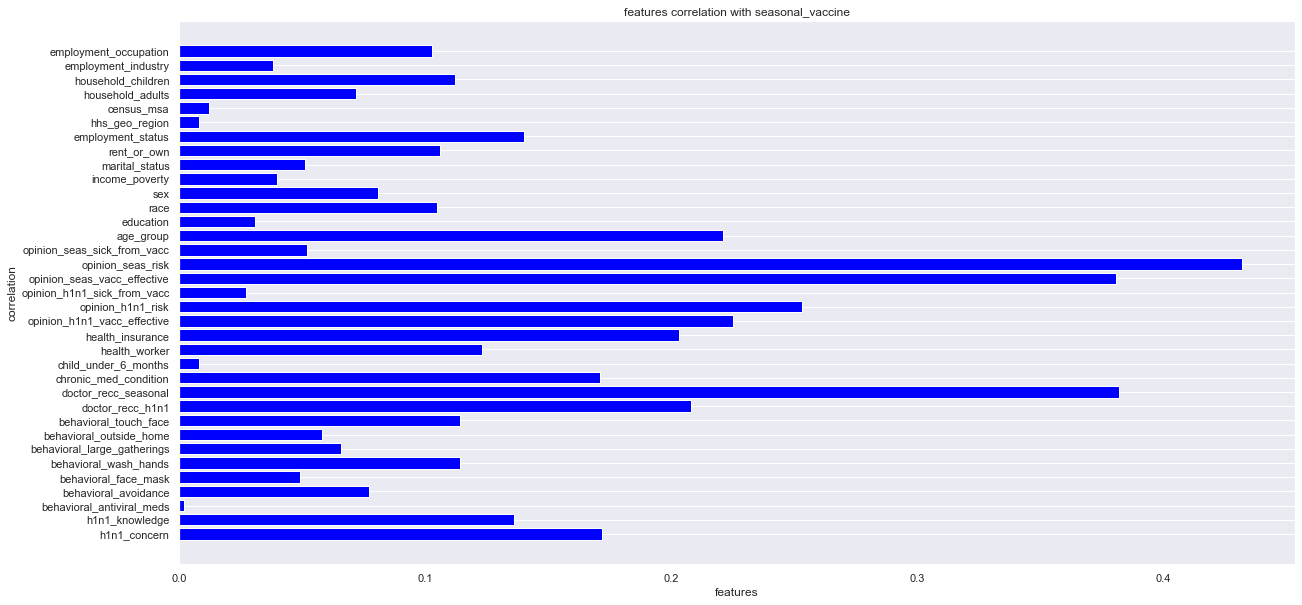

In [10]:
#user defination function calculate Y.corr(X)(correlation between target and features)
print(getCorrFeat_target(X, Y,'seasonal_vaccine')[0:3])

[('opinion_h1n1_risk', 0.416), ('doctor_recc_h1n1', 0.415), ('opinion_seas_risk', 0.335)]


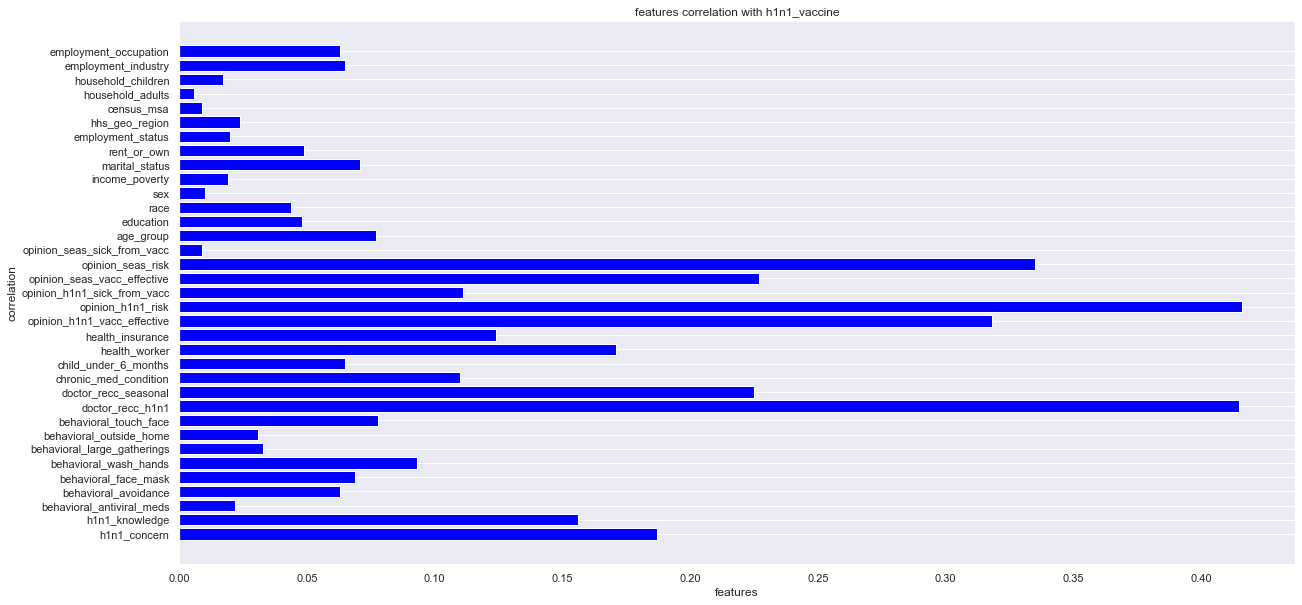

In [11]:
#user defination function calculate Y.corr(X)(correlation between target and features)
print(getCorrFeat_target(X, Y,'h1n1_vaccine')[0:3])

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib.pyplot import figure
model = ExtraTreesClassifier()
model.fit(X, Y['h1n1_vaccine'])
t1  = model.feature_importances_
ind = np.argsort(t1)

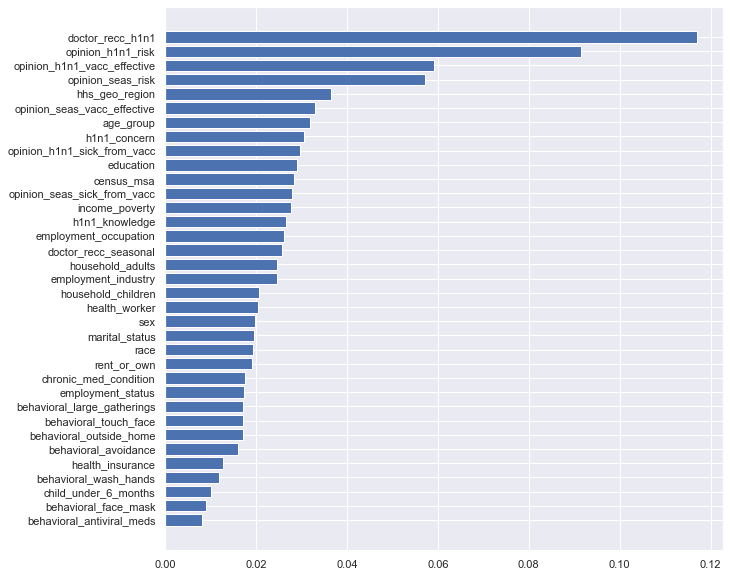

In [13]:
fig, ax = plt.subplots(); fig.set_size_inches(10,10); ax.barh(range(len(t1)),t1[ind]); ax.set_yticks(range(len(t1)))
_ = ax.set_yticklabels(np.array(X.columns)[ind])

In [14]:
model = ExtraTreesClassifier()
model.fit(X, Y['seasonal_vaccine'])
t1  = model.feature_importances_
ind = np.argsort(t1)

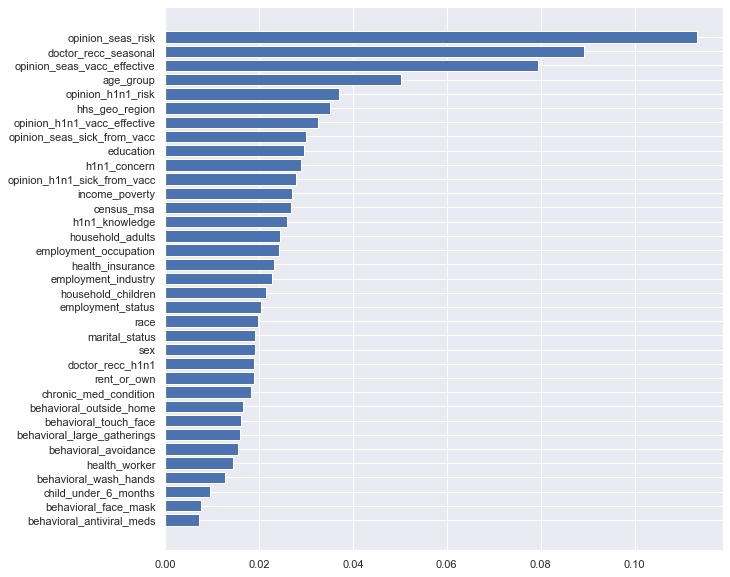

In [15]:
fig, ax = plt.subplots(); fig.set_size_inches(10,10); ax.barh(range(len(t1)),t1[ind]); ax.set_yticks(range(len(t1)))
_ = ax.set_yticklabels(np.array(X.columns)[ind])

### Feature analysis using PCA

In [16]:
from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA

s=[]
for i in range(1,len(X.columns)+1):
    pca = PCA(n_components = i)
    fit = pca.fit_transform(X)
    #x_pca = pd.DataFrame(fit),     x_pca.head()
    explained_variance = 100*pca.explained_variance_ratio_
    s.append(round(sum(explained_variance),3))
for i in range(len(s)):
    if s[i]>=80:
        break

cols = X.columns
important_features = cols[0:i]
X = X[cols[0:i]] # drop uninportant columns

In [17]:
print("imporatnt feture\n",important_features)#get feature that give 80 % information of samples
print(X.shape)

imporatnt feture
 Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc'],
      dtype='object')
(13506, 21)


## Build model

In [18]:
# the dataset already splitted into train,test dataset(seperated files),\
#but to test and develope we will split our trainSet(alreay has target label, but testSet doesn't) 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42, shuffle = True, stratify=Y)

In [19]:
#Grid search
def gridSearchModelWith(model, X_train, X_test, y_train, y_test,
                        grid, n_splits, ERROR_TYPE = 'f1_score'
                       ):
    gs = GridSearchCV(model, param_grid=grid, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    gs.fit(X_train, y_train)
    model = gs.best_estimator_
    return model

In [20]:
#Error function
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, f1_score
def calc_error(ERROR_TYPE, a, b, avg = 'macro', prec=3):
    err = 0
    if ERROR_TYPE == 'mse':
        return np.round(mse(a, b, average=avg), prec)
    elif ERROR_TYPE == 'r2':
        return np.round(r2(a, b, average=avg), prec)
    elif ERROR_TYPE == 'f1_score':
        return np.round(f1_score(a, b, average=avg), prec)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [22]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

grid1 = {
    'estimator__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
grid2 = {
    'estimator__n_neighbors':range(3,22,2)
}
grid3 = [{
    'estimator__n_estimators':[2, 3, 4],
    'estimator__max_features':list(range(1,len(X_test.columns)))
}]
m1 = MultiOutputClassifier(LogisticRegression())#.fit(X_train, y_train)
m2 = MultiOutputClassifier(KNeighborsClassifier())#.fit(X_train, y_train)
m3 = MultiOutputClassifier(RandomForestClassifier())#.fit(X_train, y_train)
gs1 = gridSearchModelWith(m1,X_train, X_test, y_train, y_test,grid1,5)
gs2 = gridSearchModelWith(m2,X_train, X_test, y_train, y_test,grid2,5)
gs3 = gridSearchModelWith(m3,X_train, X_test, y_train, y_test,grid3,5)
print(gs1,"\n",gs2,"\n",gs3)

MultiOutputClassifier(estimator=LogisticRegression(C=0.1)) 
 MultiOutputClassifier(estimator=KNeighborsClassifier(n_neighbors=19)) 
 MultiOutputClassifier(estimator=RandomForestClassifier(max_features=5,
                                                       n_estimators=4))


### Performance of 3 models
(LogisticRegression, KNeighborsClassifier, RandomForestClassifier)

In [23]:
print(len(X_test), len(y_train['h1n1_vaccine']), len(y_train['seasonal_vaccine']))
y_test_pred1 = gs1.predict(X_test)
y_test_pred2 = gs2.predict(X_test)
y_test_pred3 = gs3.predict(X_test)

y_train_pred1 = gs1.predict(X_train)
y_train_pred2 = gs2.predict(X_train)
y_train_pred3 = gs3.predict(X_train)

res1 = [calc_error('f1_score',y_train_pred1, y_train), calc_error('f1_score', y_test_pred1, y_test)]#,gs1.best_params_]
res2 = [calc_error('f1_score',y_train_pred1, y_train), calc_error('f1_score', y_test_pred2, y_test)]#,gs2.best_params_]
res3 = [calc_error('f1_score',y_train_pred1, y_train), calc_error('f1_score', y_test_pred3, y_test)]#,gs3.best_params_]

4052 9454 9454


In [24]:
def showResMl():
    plt.figure(figsize =(15,5))
    plt.subplot(1,2,1)
    v1 = [res1[0],res2[0],res3[0]]
    plt.bar(["Logistic Reg","KNN","Random Forest"], v1,color=['blue'],width = 0.3)
    plt.title('Train')
    plt.grid(axis='x')
    plt.xlabel('used algorthim');
    plt.ylabel('f1_score');
    plt.vlines(np.argmax(v1),0, np.max(v1),alpha=1, colors='r', linestyles='-')

    plt.subplot(1,2,2)
    v2 = [res1[1],res2[1],res3[1]]
    plt.bar(["Logistic Reg","KNN","Random Forest"],v2,color=['green'],width = 0.3)
    plt.title('Test')
    plt.grid(axis='x')
    plt.xlabel('used algorthim');
    plt.ylabel('f1_score');
    plt.vlines(np.argmax(v2),0, np.max(v2),alpha=1, colors='r', linestyles='-')

f1_score Logistic Regression:  [0.715, 0.717]
f1_score Knn:  [0.715, 0.682]
f1_score Random Forest:  [0.715, 0.628]


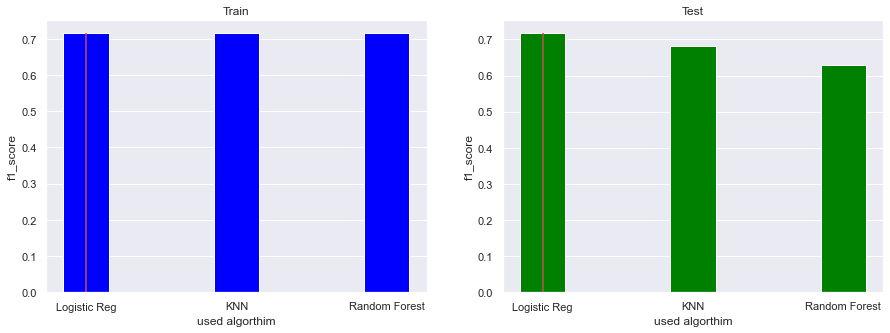

In [25]:
showResMl() # show train,test  f1_score of used algorithms 
print("f1_score Logistic Regression: ", res1)
print("f1_score Knn: ", res2)
print("f1_score Random Forest: ", res3)

In [26]:
bestModelIndex = np.argmax([res1,res2,res3][1])
if bestModelIndex == 0:
    model = gs1
elif bestModelIndex == 1:
    model = gs2
else: 
    model = gs3

In [27]:
def findPredProb(model, X_test,y_test):
    c_proba_all = model.predict_proba(X_test)
    y1_test = y_test['h1n1_vaccine']
    y2_test = y_test['seasonal_vaccine']
    y1_prob = c_proba_all[0]
    y2_prob = c_proba_all[1]
    
    y1_prob_last = [[],[]]
    y2_prob_last = [[],[]]
    for i in range(len(y1_test)):
        y1_prob_last[0].append(y1_prob[i][0])
        y1_prob_last[1].append(y1_prob[i][1])
        y2_prob_last[0].append(y2_prob[i][0])
        y2_prob_last[1].append(y2_prob[i][1])
    #print("prob after: ",len(y1_prob_last)*len(y1_prob_last[0])//2,len(y2_prob_last)*len(y1_prob_last[0])//2)
    c00 = c_proba_all[0]
    c11 = c_proba_all[1]
    c00 = c00[:,1]
    c11 = c11[:,1]
    c0 = [round(num,1) for num in c00]
    c1 = [round(num,1) for num in c11]
    return (y1_test, y2_test, c0, c1)

## Roc_Curve

In [28]:
y1_test, y2_test, c0, c1 = findPredProb(model, X_test,y_test)

In [29]:
#Plot Roc_Curve
from sklearn.metrics import roc_curve, roc_auc_score

def plot_ROC_AUC(y_test, y_prob,clr,lbl):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.step(fpr, tpr, color=clr, alpha=0.9,where='post',label=lbl)
    plt.fill_between(fpr, tpr, alpha=0.1, color='b')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

y_score:  0.8469697749933305 	 0.8505442018920435


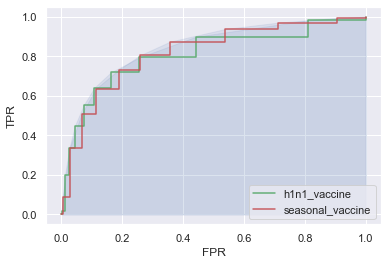

In [30]:
plot_ROC_AUC(y1_test,c0,'g',"h1n1_vaccine")
plot_ROC_AUC(y2_test,c1,'r',"seasonal_vaccine")
y1_score  = roc_auc_score(y1_test, c0,average ='macro')
y2_score = roc_auc_score(y2_test, c1, average ='macro')
print("y_score: ",y1_score,"\t",y2_score)

## Prediction for X_test from file

In [31]:
imFeatures =  X_test.columns #get important features from DATASET THAT ALREADY processed
print("imFeatures: ",len(imFeatures))
X_test = pd.read_csv('test_set_features.csv', sep=',', index_col='respondent_id')
X_test = X_test[imFeatures]

X_test = EncodeCategorical(X_test) # Encode categorical variable
X_test = drop_null_values(X_test)#handle missing variable
X_test = normalizeData(X_test, X_test.columns)# normalize data using sklearn.preprocessing.StandardScaler

imFeatures:  21


### Performance evaluation

In [32]:
data= model.predict(X_test)
tmp = pd.DataFrame(data,columns=['h1n1_vaccine','seasonal_vaccine'])
y1_test, y2_test, c0, c1 = findPredProb(model, X_test, tmp)

y_score:  0.9979116120067815 	 0.9973183241548695


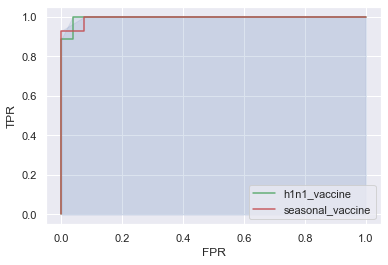

In [33]:
plot_ROC_AUC(y1_test,c0,'g',"h1n1_vaccine")
plot_ROC_AUC(y2_test,c1,'r',"seasonal_vaccine")

y1_score, y2_score = roc_auc_score(y1_test, c0,average ='macro'), roc_auc_score(y2_test, c1, average ='macro')
print("y_score: ",y1_score,"\t",y2_score)

### Save results

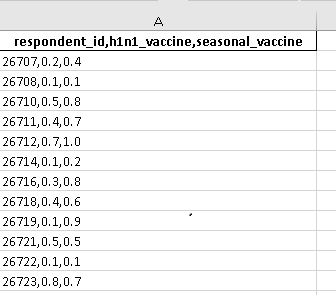

In [34]:
respondent_id = list(X_test.index)
outputToSave = []
data = []

for i in range(len(y1_test)):
    outputToSave.append(str(respondent_id[i]) +',' +
                        str(c0[i]) +','+ 
                        str(c1[i])
                       )
    data.append([respondent_id[i], c0[i], c1[i]])
    
col = ['respondent_id,'+'h1n1_vaccine,'+'seasonal_vaccine']
OutputFormat = pd.DataFrame(outputToSave,columns=col)

xxx = pd.DataFrame(data,columns=['respondent_id','h1n1_vaccine','seasonal_vaccine'])
OutputFormat.to_excel("file_name.xlsx",index = False)

### Results after data prediction

In [35]:
def showLastResults():
    plt.figure(figsize =(12,4))
    plt.subplot(1,2,1)
    plt.hist(xxx['h1n1_vaccine'],bins=20,label = ['h1n1_vaccine'],color=['blue'], width=0.05);
    plt.xticks(list(set(xxx['h1n1_vaccine'])));
    plt.ylabel('#'); plt.xlabel('Probability');
    plt.title("Statistics h1n1_vaccine");
    plt.grid(axis='x');
    plt.subplot(1,2,2), plt.title("Statistics seasonal_vaccine")
    plt.hist(xxx['seasonal_vaccine'],bins=20,label = ['#seasonal_vaccine'],color=['green'], width=0.05);
    plt.xlabel('Probability'); 
    plt.xticks(list(set(xxx['seasonal_vaccine'])));

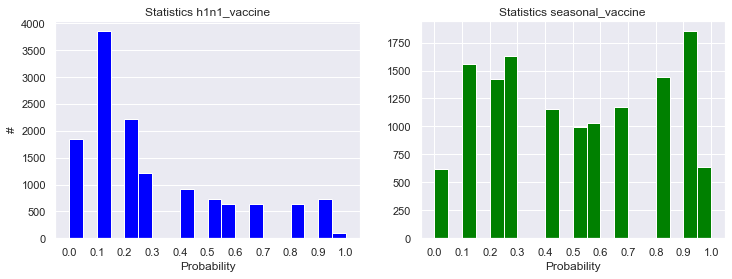

In [36]:
showLastResults()
#very little people will take h1n1_vaccine
#alot of people ready to take seasonal_vaccine

## Thanks alot